In [17]:
import pandas as pd
import numpy as np
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.stats import shapiro, mannwhitneyu
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.manifold import TSNE

In [5]:
file_path = "/content/drive/MyDrive/MLR503 Final Exam Preparation/b5c536467c30d66ab97cd1f5c9a3497d-5233c792af49c9b78f20c35d5cd729e1307a7df7 (1).zip"
extract_to = "/content/drive/MyDrive/MLR503 Final Exam Preparation/challenge1Data"

In [6]:
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [7]:
extracted_files = os.listdir(extract_to)
extracted_files

['b5c536467c30d66ab97cd1f5c9a3497d-5233c792af49c9b78f20c35d5cd729e1307a7df7']

In [9]:
nested_path = os.path.join(extract_to, extracted_files[0])
nested_files = os.listdir(nested_path)
nested_files

['breast-cancer.csv', 'field_names.txt']

• Load in the data file and header file provided

- The dataframe does not currently have a header, load in the header file and attach it to the dataframe

In [10]:
header_file = os.path.join(nested_path, 'field_names.txt')
data_file = os.path.join(nested_path, 'breast-cancer.csv')

with open(header_file, 'r') as file:
    headers = file.read().splitlines()

data = pd.read_csv(data_file, header=None, names=headers)

data.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Comment on any steps you might take to evaluate or transform the dataset.

I don't think there's anything to do here to "transform" the data. It is the way it is, but you can drop things like the ID. The target is the diagnosis, which can be transformed into 0 and 1. Let's do that here:

In [11]:
data

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
data = data.drop(columns=['ID'])

In [13]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
data

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


This is good. This is all we need to do for now to transform the data. No need to normalize or anything for now, I think.

Compute the mean and median smoothness and compactness for benign and malignant
tumors - do they differ? Explain how you would identify this.

In [15]:
mean_median_stats = data.groupby('diagnosis')[['compactness_mean', 'smoothness_mean']].agg(['mean', 'median'])
mean_median_stats

compactness_mean          smoothness_mean        
                      mean   median            mean  median
diagnosis                                                  
0                 0.021438  0.01631        2.000321  1.8510
1                 0.032281  0.02859        4.323929  3.6795

We can see that there are numerically some differences between the two of them for benign and malignant samples. Clearly, when it is malignant, the mean and median for both compactness_mean and smoothness_mean are higher. It would be nice to see the distributions here as well.

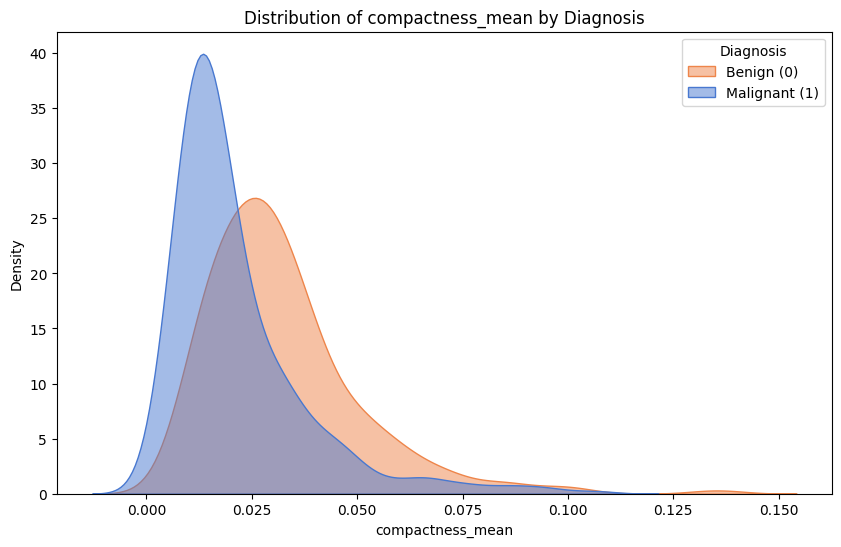

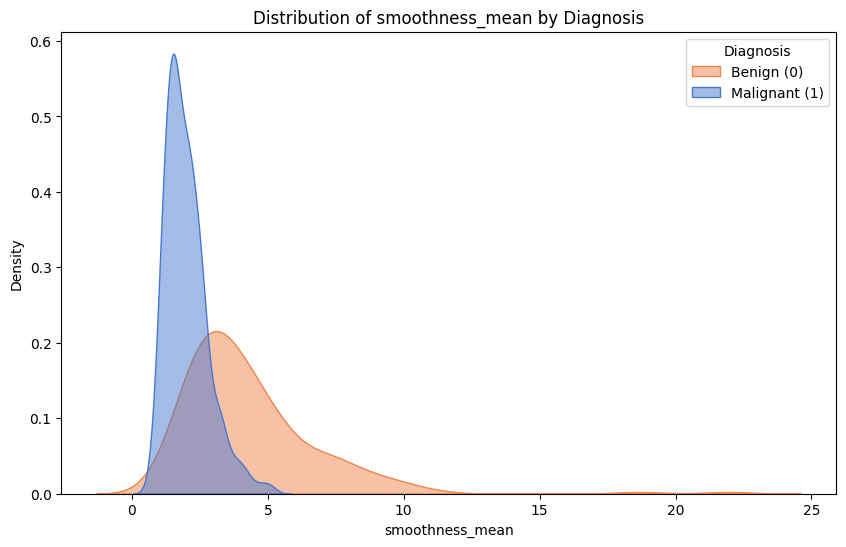

In [18]:
features = ['compactness_mean', 'smoothness_mean']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=data, x=feature, hue='diagnosis', fill=True, common_norm=False, alpha=0.5, palette="muted")
    plt.title(f"Distribution of {feature} by Diagnosis")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend(title='Diagnosis', labels=['Benign (0)', 'Malignant (1)'])
    plt.show()

Clearly, for the malignant cases, in both features the distributions are more concentrated and reach a higher peak (more density). Now, we want to see whether or not the differences are statistically significant. How do we do this?

First, check to see if the two features are normally distributed. We can evidently see from the plots that they are not. But let's check this anyway.

In [20]:



features = ['compactness_mean', 'smoothness_mean']

for feature in features:
    stat, p_value = shapiro(data[feature])
    print(f"{feature}: Statistics={stat}, p={p_value}")
    if p_value > 0.05:
        print(f"{feature} appears to be normally distributed (p > 0.05).")
        print("-"*100)
    else:
        print(f"{feature} does not appear to be normally distributed (p <= 0.05).")
        print("-"*100)


compactness_mean: Statistics=0.8368784992326188, p=1.0829572864000895e-23
compactness_mean does not appear to be normally distributed (p <= 0.05).
----------------------------------------------------------------------------------------------------
smoothness_mean: Statistics=0.7181640585986433, p=7.587487078860396e-30
smoothness_mean does not appear to be normally distributed (p <= 0.05).
----------------------------------------------------------------------------------------------------


Neither of them are normally distributed, which means that we will have to use something other than the Pearson correlation coefficient. What would we use?

We will be using the Mann-Whittney U test, which is suitable for non-normally distributed data.

In [21]:
for feature in features:
    benign = data[data['diagnosis'] == 0][feature]
    malignant = data[data['diagnosis'] == 1][feature]
    stat, p_value = mannwhitneyu(benign, malignant, alternative='two-sided')
    print(f"Mann-Whitney U test for {feature}: Statistics={stat}, p={p_value}")
    if p_value < 0.05:
        print(f"There is a statistically significant difference in {feature} between malignant and benign cases (p < 0.05).")
        print("-"*100)
    else:
        print(f"No statistically significant difference in {feature} between malignant and benign cases (p >= 0.05).")
        print("-"*100)

Mann-Whitney U test for compactness_mean: Statistics=20640.5, p=1.1680614494180086e-19
There is a statistically significant difference in compactness_mean between malignant and benign cases (p < 0.05).
----------------------------------------------------------------------------------------------------
Mann-Whitney U test for smoothness_mean: Statistics=9355.0, p=5.099437378225837e-51
There is a statistically significant difference in smoothness_mean between malignant and benign cases (p < 0.05).
----------------------------------------------------------------------------------------------------


In both cases, we can see that the p-value is extremely small, meaning that there is a statistically significant difference between the two of them across the target variable (malignant or benign).

Write a function to generate bootstrap samples of the data:

We will be assuming that bootstrapping is just sampling with replacement.

In [22]:
def generate_bootstrap_samples(data, n_samples):
    """
    Generate bootstrap samples from the given dataframe.

    Parameters:
        data (pd.DataFrame): The dataset to sample from.
        n_samples (int): Number of bootstrap samples to generate.

    Returns:
        list: A list of bootstrap sample dataframes.
    """
    bootstrap_samples = [data.sample(frac=1, replace=True) for _ in range(n_samples)]
    return bootstrap_samples

I think it's better to just keep this and not use it. We only have 569 data points, so if we are sampling we're not really doing too much. Maybe we can use it later for ensemble methods. For now, keep it as is.

- Identify 2-3 variables that are predictive of a malignant tumor. Display the relationship visually and write 1-2 sentences explaining the
relationship.

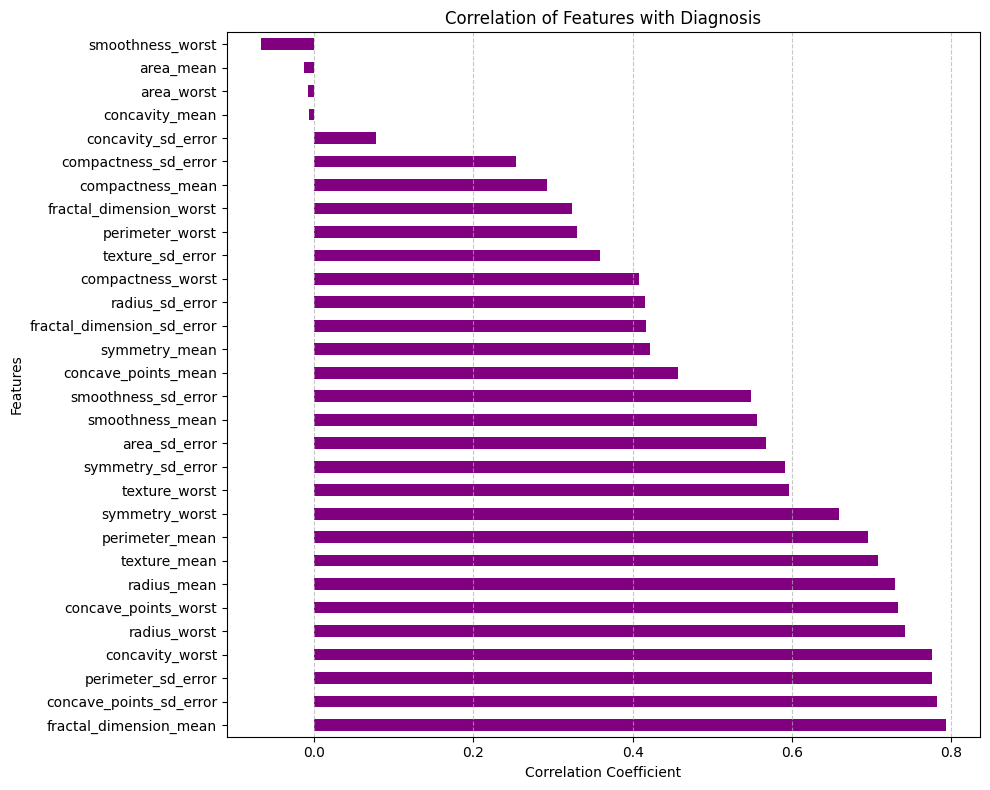

In [24]:
correlations = data.corr()['diagnosis'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
correlations.drop('diagnosis').plot(kind='barh', color='purple')
plt.title('Correlation of Features with Diagnosis')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Just a very simple plot to show the correlations. We will take the top 5 with highest correlation and analyze the relationship with the target var (diagnosis).

In [25]:
top_features = correlations.index[1:6] ## Just to get the top 5

<ipython-input-26-c369aaeb00c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='diagnosis', y=feature, palette='coolwarm')


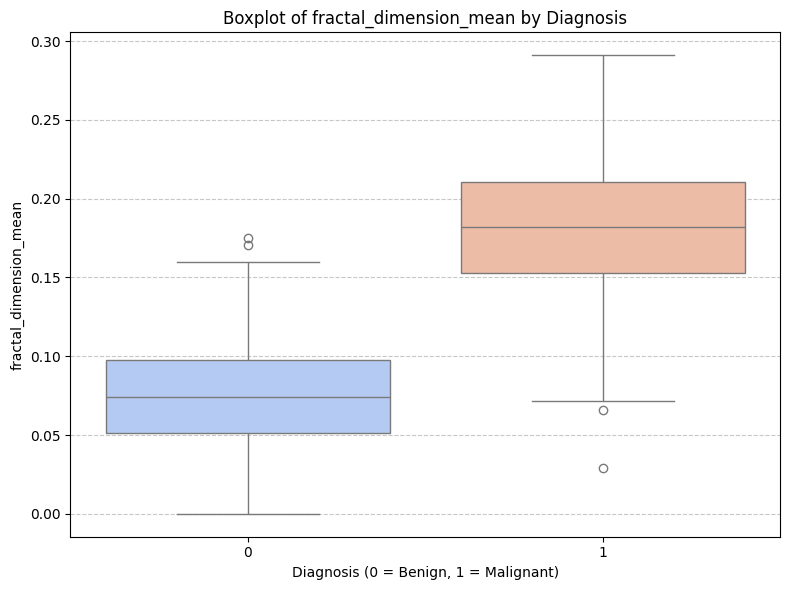

Mann-Whitney U test for fractal_dimension_mean: Statistics=2520.0, p=1.8639972354360316e-77
There is a statistically significant difference in fractal_dimension_mean between malignant and benign cases (p < 0.05).
----------------------------------------------------------------------------------------------------


<ipython-input-26-c369aaeb00c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='diagnosis', y=feature, palette='coolwarm')


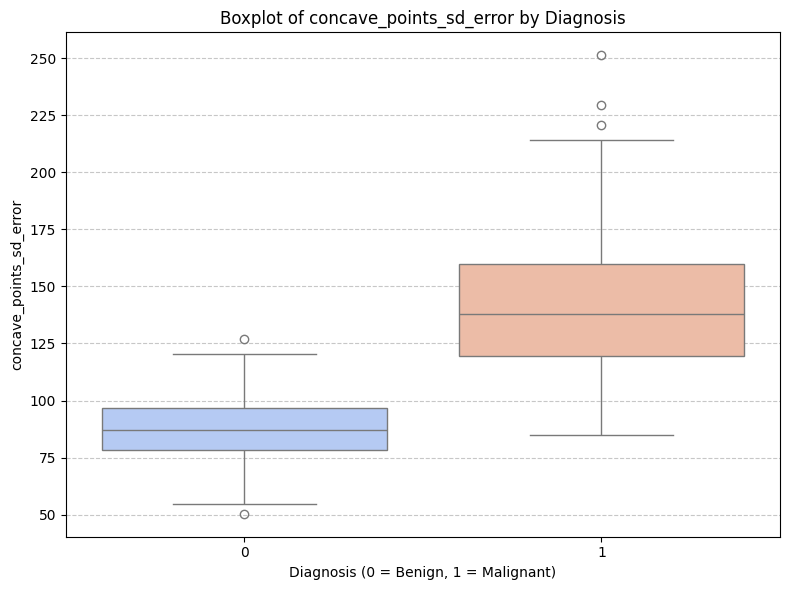

Mann-Whitney U test for concave_points_sd_error: Statistics=1858.0, p=2.5830037182989858e-80
There is a statistically significant difference in concave_points_sd_error between malignant and benign cases (p < 0.05).
----------------------------------------------------------------------------------------------------


<ipython-input-26-c369aaeb00c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='diagnosis', y=feature, palette='coolwarm')


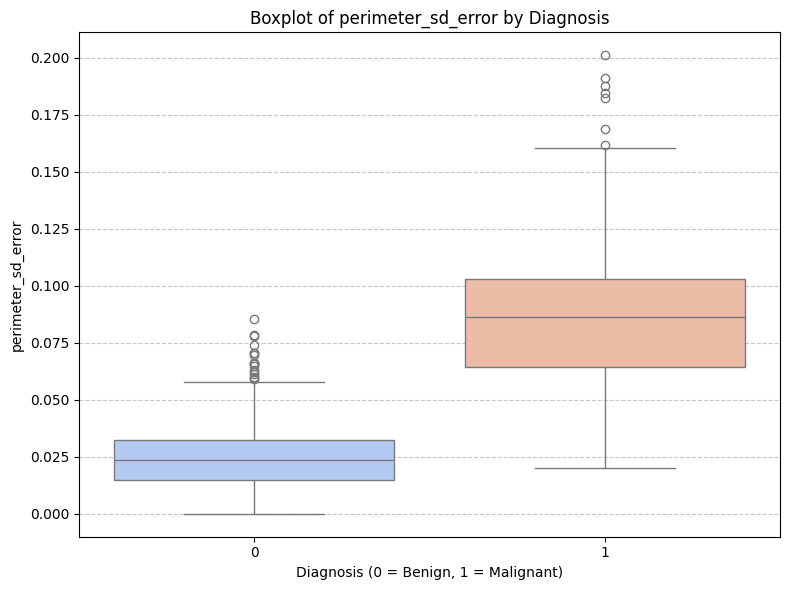

Mann-Whitney U test for perimeter_sd_error: Statistics=2691.5, p=1.0063237037340002e-76
There is a statistically significant difference in perimeter_sd_error between malignant and benign cases (p < 0.05).
----------------------------------------------------------------------------------------------------


<ipython-input-26-c369aaeb00c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='diagnosis', y=feature, palette='coolwarm')


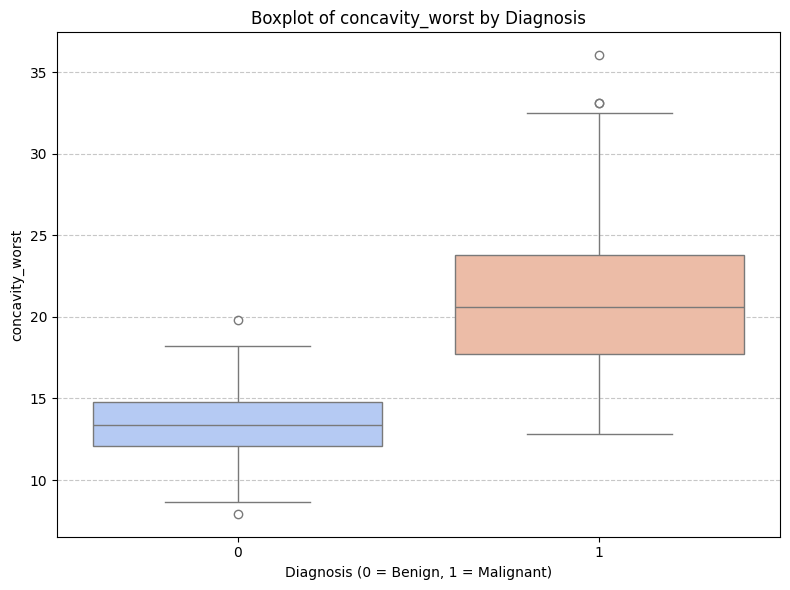

Mann-Whitney U test for concavity_worst: Statistics=2237.0, p=1.1356300904893913e-78
There is a statistically significant difference in concavity_worst between malignant and benign cases (p < 0.05).
----------------------------------------------------------------------------------------------------


<ipython-input-26-c369aaeb00c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='diagnosis', y=feature, palette='coolwarm')


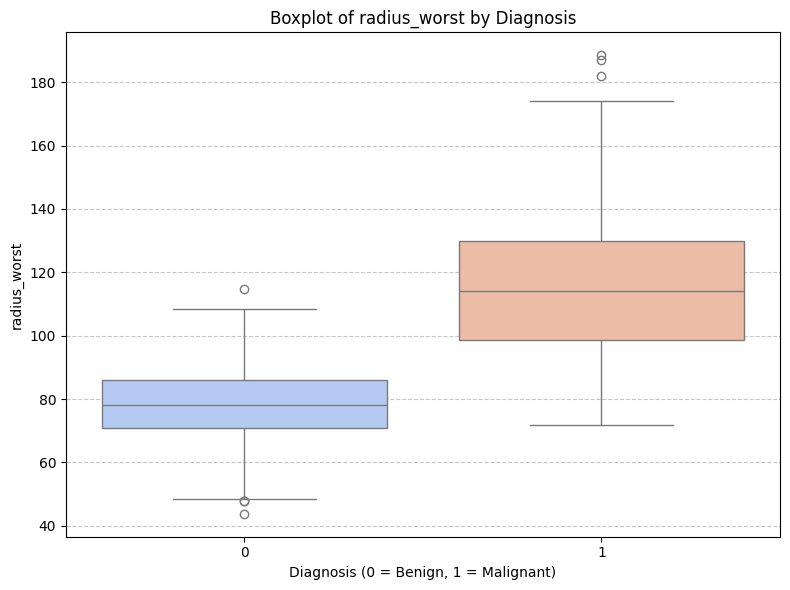

Mann-Whitney U test for radius_worst: Statistics=4019.0, p=3.553870225963875e-71
There is a statistically significant difference in radius_worst between malignant and benign cases (p < 0.05).
----------------------------------------------------------------------------------------------------


In [26]:
for feature in top_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x='diagnosis', y=feature, palette='coolwarm')
    plt.title(f"Boxplot of {feature} by Diagnosis")
    plt.xlabel("Diagnosis (0 = Benign, 1 = Malignant)")
    plt.ylabel(feature)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Perform Mann-Whitney U test for statistical significance
    benign = data[data['diagnosis'] == 0][feature]
    malignant = data[data['diagnosis'] == 1][feature]
    stat, p_value = mannwhitneyu(benign, malignant, alternative='two-sided')
    print(f"Mann-Whitney U test for {feature}: Statistics={stat}, p={p_value}")
    if p_value < 0.05:
        print(f"There is a statistically significant difference in {feature} between malignant and benign cases (p < 0.05).")
        print("-"*100)
    else:
        print(f"No statistically significant difference in {feature} between malignant and benign cases (p >= 0.05).")
        print("-"*100)

These are all the box-plots. We can see visually that there is some difference between the malignant and benign cases. Also, through doing the Mann-Whitney U test, we can see that the differences are statistically significant as well (for all of them).

Therefore, we conclude that for each of the top-5 highest correlated features, higher values indicate more of a possibility of malignant tumors.

• Build a model to predict the malignant tumors.

- Use at least two classification techniques; compare and contrast the advantages and disadvantages of each.

- Identify how you would control for overfitting in each classification technique.

- Evaluate the performance of each model.

In [32]:
## This is pretty straight-forward. Let's use all the models that we are aware of.
## This means we will use the following:
## Logistic Regression
## SVM with different kernels (linear, RBF, polynomial, and sigmoid)
## Decision tree

We will use only the top-5 features to do this, although this can easily be changed.

In [28]:
X = data[top_features]
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

We will scale the data as well, because we have to now that we're building a model.

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The below code will give us all the information that we need to know about the performance of a model. We'll go through each of the models one by one, get the accuracy, precision, recall and F1-score, the feature importances, and the confusion matrix.

In [30]:
## Logistic Regression:

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))
log_reg_importance = np.abs(log_reg.coef_[0])
log_reg_features = pd.Series(log_reg_importance, index=top_features).sort_values(ascending=False)
print("Feature Importance in Logistic Regression:")
print(log_reg_features)

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Feature Importance in Logistic Regression:
concavity_worst            2.225763
concave_points_sd_error    1.695013
fractal_dimension_mean     1.544855
perimeter_sd_error         1.085945
radius_worst               0.456793
dtype: float64


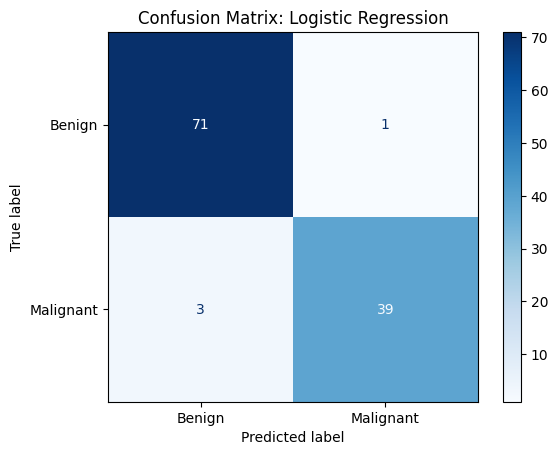

In [33]:
cm_log = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(cm_log, display_labels=['Benign', 'Malignant']).plot(cmap='Blues')
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

SVM with linear kernel Results:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Feature Importance in Linear SVM:
concavity_worst            2.094882
radius_worst               1.253504
concave_points_sd_error    1.028995
fractal_dimension_mean     0.936012
perimeter_sd_error         0.700033
dtype: float64


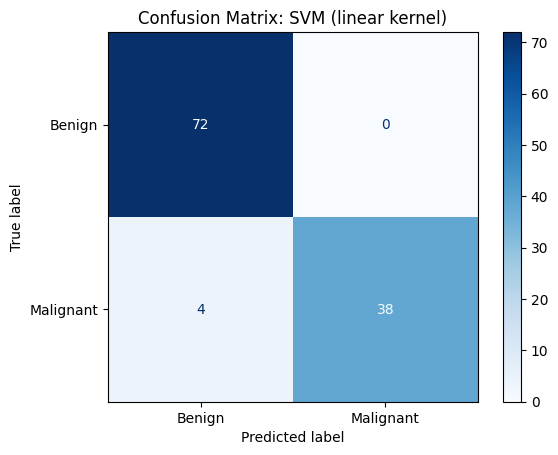

SVM with poly kernel Results:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        72
           1       1.00      0.69      0.82        42

    accuracy                           0.89       114
   macro avg       0.92      0.85      0.87       114
weighted avg       0.90      0.89      0.88       114



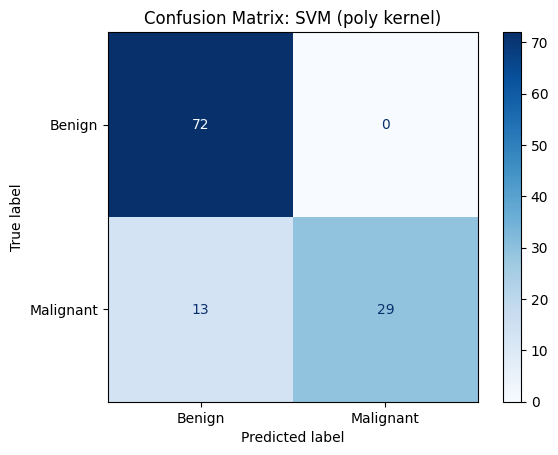

SVM with rbf kernel Results:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



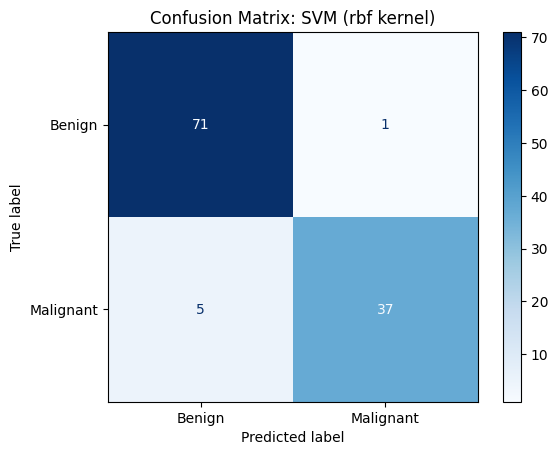

SVM with sigmoid kernel Results:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        72
           1       0.91      0.98      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



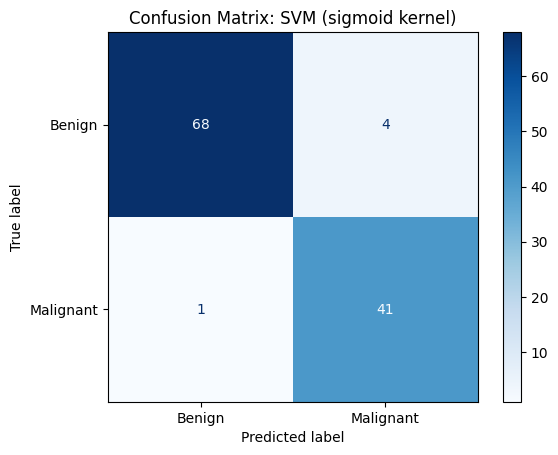

In [34]:
## SVM with different kernels:

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42, probability=True)
    svm.fit(X_train_scaled, y_train)
    y_pred_svm = svm.predict(X_test_scaled)
    print(f"SVM with {kernel} kernel Results:")
    print(classification_report(y_test, y_pred_svm))
    if kernel == 'linear':
        svm_importance = np.abs(svm.coef_[0])
        svm_features = pd.Series(svm_importance, index=top_features).sort_values(ascending=False)
        print("Feature Importance in Linear SVM:")
        print(svm_features)


    # Confusion Matrix for SVM
    cm_svm = confusion_matrix(y_test, y_pred_svm)
    ConfusionMatrixDisplay(cm_svm, display_labels=['Benign', 'Malignant']).plot(cmap='Blues')
    plt.title(f"Confusion Matrix: SVM ({kernel} kernel)")
    plt.show()

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        72
           1       0.95      0.83      0.89        42

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114

Feature Importance in Decision Tree:
concave_points_sd_error    0.751130
fractal_dimension_mean     0.142067
concavity_worst            0.061766
perimeter_sd_error         0.029628
radius_worst               0.015409
dtype: float64


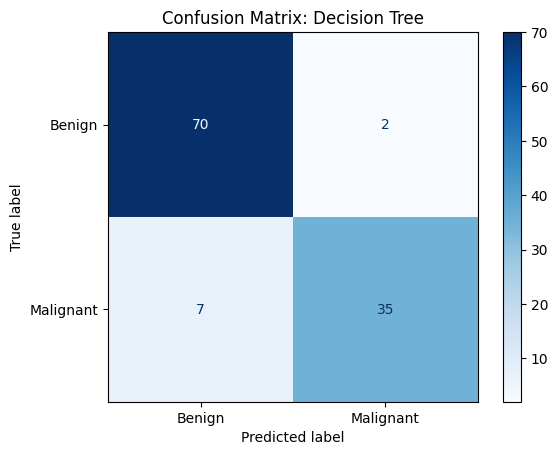

In [35]:
## Decision tree

dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)
y_pred_tree = dec_tree.predict(X_test)
print("Decision Tree Results:")
print(classification_report(y_test, y_pred_tree))
dec_tree_importance = pd.Series(dec_tree.feature_importances_, index=top_features).sort_values(ascending=False)
print("Feature Importance in Decision Tree:")
print(dec_tree_importance)

cm_tree = confusion_matrix(y_test, y_pred_tree)
ConfusionMatrixDisplay(cm_tree, display_labels=['Benign', 'Malignant']).plot(cmap='Blues')
plt.title("Confusion Matrix: Decision Tree")
plt.show()

Let us now try to visualize the data. We have 32 features, but we want to show it on a 2D plane. Therefore, we can do PCA with n_components = 2, or tSNE. Let's do PCA first.

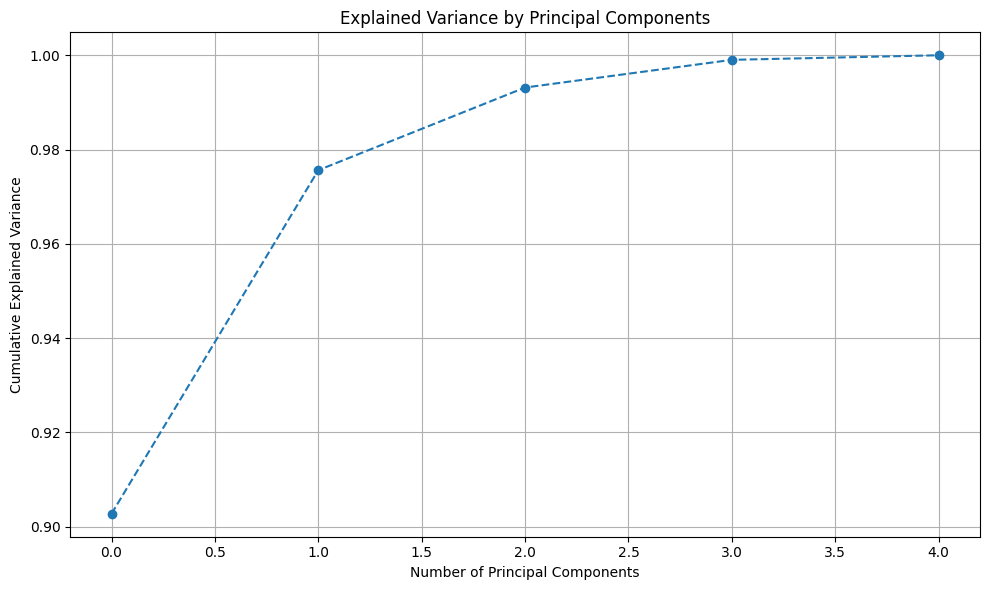

In [48]:
pca = PCA()
X_train_pca_full = pca.fit_transform(X_train_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [37]:
svm_rbf_2d = SVC(kernel='rbf', random_state=42, probability=True)
svm_rbf_2d.fit(X_train_pca, y_train)

x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))


In [38]:
Z = svm_rbf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

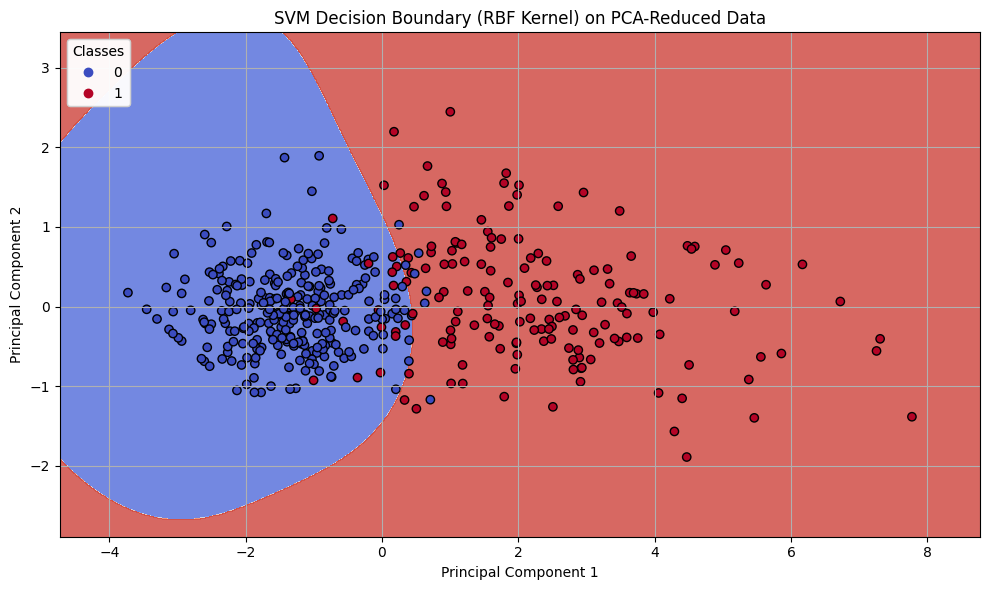

In [39]:
# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training data points
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
legend1 = plt.legend(*scatter.legend_elements(), title="Classes", loc="upper left")
plt.gca().add_artist(legend1)

plt.title("SVM Decision Boundary (RBF Kernel) on PCA-Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


Very interesting. We have something for sure here. Let's do the same for the other models (Again, with PCA, n_components = 2).

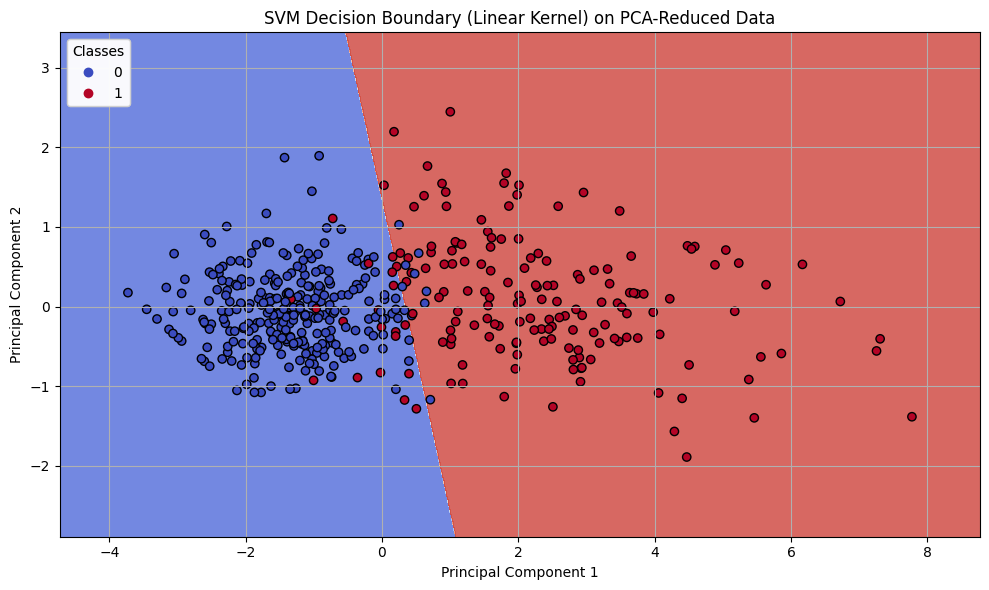

In [40]:
svm_linear_2d = SVC(kernel='linear', random_state=42, probability=True)
svm_linear_2d.fit(X_train_pca, y_train)

Z = svm_linear_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training data points
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
legend1 = plt.legend(*scatter.legend_elements(), title="Classes", loc="upper left")
plt.gca().add_artist(legend1)

plt.title("SVM Decision Boundary (Linear Kernel) on PCA-Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


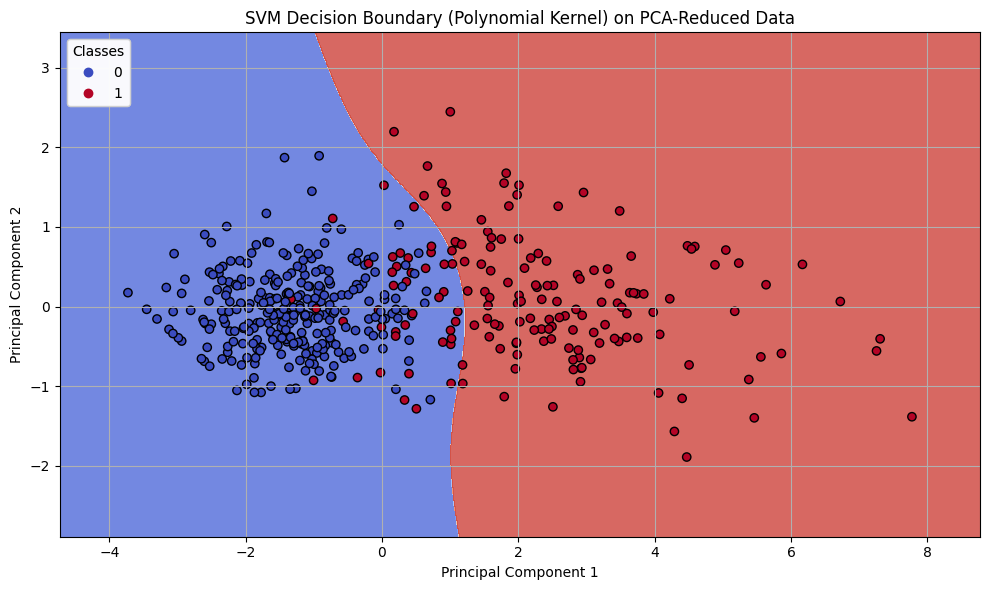

In [42]:
svm_polynomial_2d = SVC(kernel='poly', random_state=42, probability=True)
svm_polynomial_2d.fit(X_train_pca, y_train)

Z = svm_polynomial_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training data points
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
legend1 = plt.legend(*scatter.legend_elements(), title="Classes", loc="upper left")
plt.gca().add_artist(legend1)

plt.title("SVM Decision Boundary (Polynomial Kernel) on PCA-Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


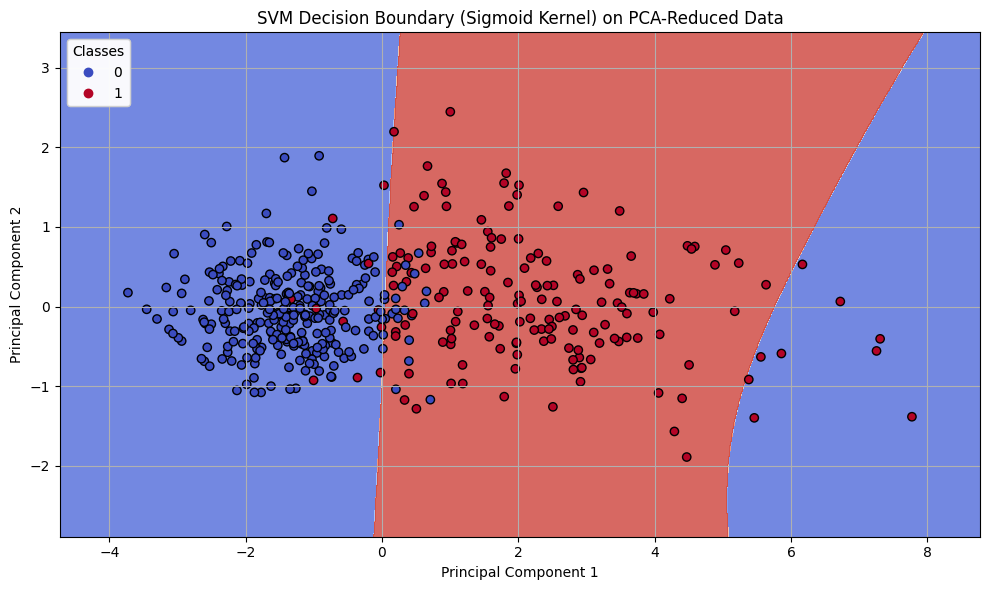

In [43]:
svm_sigmoid_2d = SVC(kernel='sigmoid', random_state=42, probability=True)
svm_sigmoid_2d.fit(X_train_pca, y_train)

Z = svm_sigmoid_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training data points
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
legend1 = plt.legend(*scatter.legend_elements(), title="Classes", loc="upper left")
plt.gca().add_artist(legend1)

plt.title("SVM Decision Boundary (Sigmoid Kernel) on PCA-Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


Let's try this for logistic regression and DT as well:

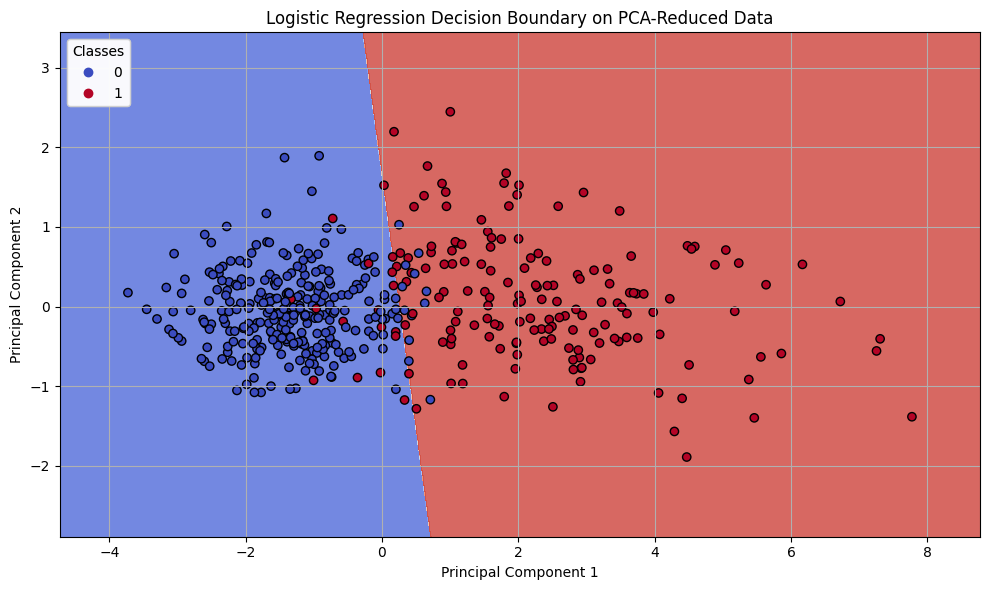

In [44]:
log_reg_PCA = LogisticRegression(random_state=42)
log_reg_PCA.fit(X_train_pca, y_train)

Z = log_reg_PCA.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training data points
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
legend1 = plt.legend(*scatter.legend_elements(), title="Classes", loc="upper left")
plt.gca().add_artist(legend1)

plt.title("Logistic Regression Decision Boundary on PCA-Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

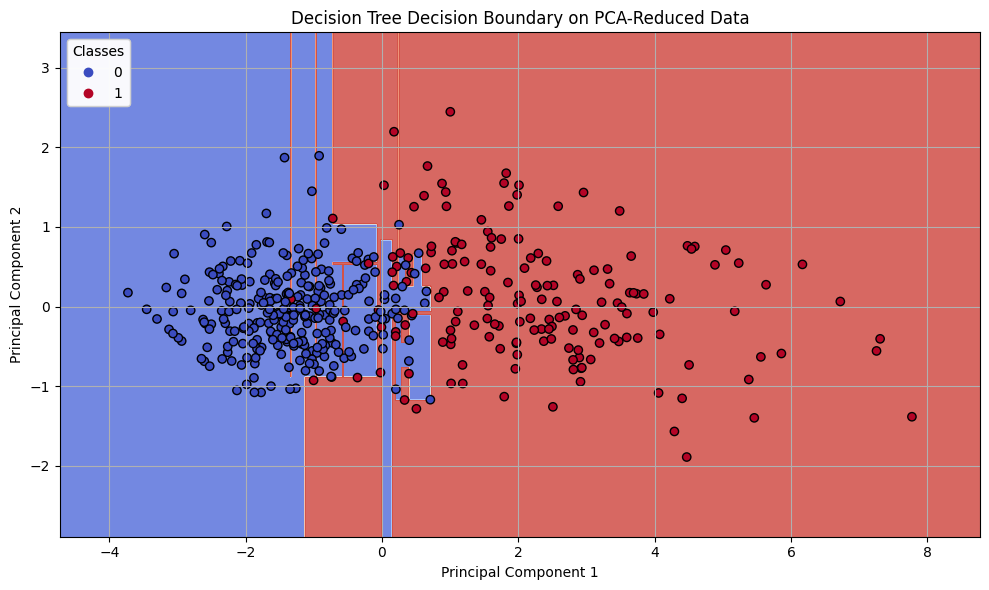

In [45]:
dec_tree_PCA = DecisionTreeClassifier(random_state=42)
dec_tree_PCA.fit(X_train_pca, y_train)

Z = dec_tree_PCA.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training data points
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
legend1 = plt.legend(*scatter.legend_elements(), title="Classes", loc="upper left")
plt.gca().add_artist(legend1)

plt.title("Decision Tree Decision Boundary on PCA-Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

Definitely more weird for the decision tree. Some cool weird stuff is happening there.

What if we use tSNE instead of using PCA?

In [46]:
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)

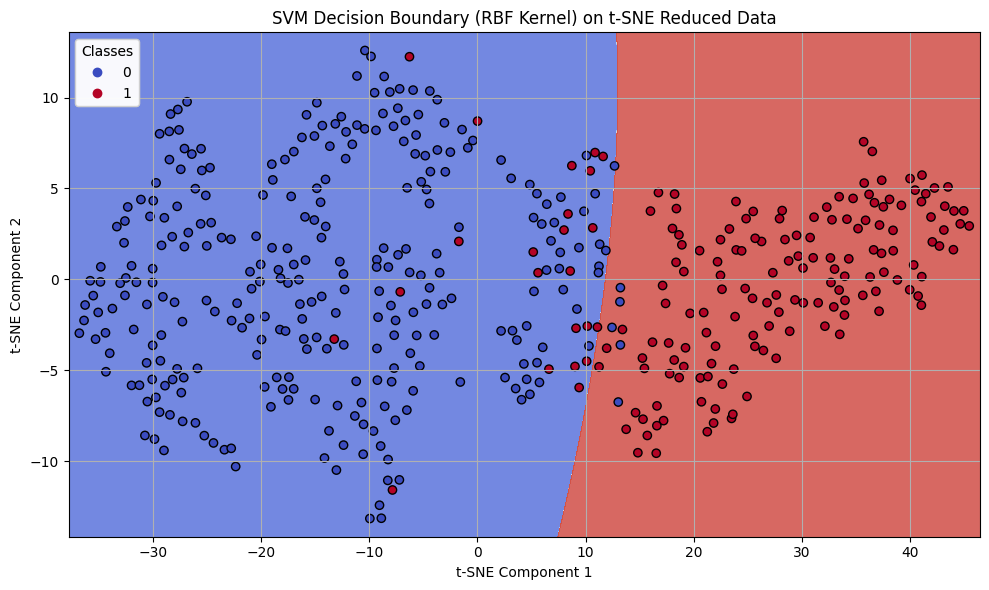

In [47]:
svm_rbf_2d_tsne = SVC(kernel='rbf', random_state=42, probability=True)
svm_rbf_2d_tsne.fit(X_train_tsne, y_train)

x_min, x_max = X_train_tsne[:, 0].min() - 1, X_train_tsne[:, 0].max() + 1
y_min, y_max = X_train_tsne[:, 1].min() - 1, X_train_tsne[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = svm_rbf_2d_tsne.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training data points
scatter = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
legend1 = plt.legend(*scatter.legend_elements(), title="Classes", loc="upper left")
plt.gca().add_artist(legend1)

plt.title("SVM Decision Boundary (RBF Kernel) on t-SNE Reduced Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


Okay, this is also interesting, I guess. There's some other stuff happening here which is cool.

What if we want to do some eXplainable AI stuff?

It genuinely seems like this part is impossible, which is great. We'll leave it at this.